In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import random

In [20]:
path = "data/time-series-19-covid-combined.csv"
df = pd.read_csv(path)
df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0
...,...,...,...,...,...,...
231739,2022-04-12,Zimbabwe,NaN,247094,0.0,5460
231740,2022-04-13,Zimbabwe,NaN,247160,0.0,5460
231741,2022-04-14,Zimbabwe,NaN,247208,0.0,5462
231742,2022-04-15,Zimbabwe,NaN,247237,0.0,5462


In [21]:
df_Colombia = df[df["Country/Region"] == "Colombia"]
df_Colombia = df_Colombia.drop("Province/State", axis = 1)
df_Colombia

,Date,Country/Region,Confirmed,Recovered,Deaths
75888,2020-01-22,Colombia,0,0.0,0
75889,2020-01-23,Colombia,0,0.0,0
75890,2020-01-24,Colombia,0,0.0,0
75891,2020-01-25,Colombia,0,0.0,0
75892,2020-01-26,Colombia,0,0.0,0
...,...,...,...,...,...
76699,2022-04-12,Colombia,6088619,0.0,139729
76700,2022-04-13,Colombia,6088912,0.0,139734
76701,2022-04-14,Colombia,6089176,0.0,139738
76702,2022-04-15,Colombia,6089381,0.0,139741


In [22]:
df_Colombia.describe()

,Confirmed,Recovered,Deaths
count,8.160000e+02,8.160000e+02,816.000000
mean,2.655683e+06,9.007714e+05,66766.323529
std,2.193425e+06,1.274866e+06,52526.047616
min,0.000000e+00,0.000000e+00,0.000000
25%,4.309835e+05,0.000000e+00,14068.000000
50%,2.267896e+06,2.977050e+04,60244.500000
75%,4.948948e+06,1.651420e+06,126076.500000
max,6.089540e+06,4.615354e+06,139745.000000


In [23]:
df_Colombia.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Recovered         0
Deaths            0
dtype: int64

In [24]:
dates = df_Colombia[["Date", "Confirmed", "Deaths", "Recovered"]].copy()
dates['Date'] = pd.to_datetime(dates['Date'])
dates = dates.set_index(dates['Date']).drop("Date",axis=1).resample('D').sum()
dates

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,0,0,0.0
2020-01-23,0,0,0.0
2020-01-24,0,0,0.0
2020-01-25,0,0,0.0
2020-01-26,0,0,0.0
...,...,...,...
2022-04-12,6088619,139729,0.0
2022-04-13,6088912,139734,0.0
2022-04-14,6089176,139738,0.0


In [25]:
def show_linePlot(df, y_type = "N.N", title = "", palette = "deep"):
    colors = sns.color_palette(palette)
    color = random.choice(colors)
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    ax = sns.lineplot(df, x=df.index, y=y_type, color=color)    
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}'))
    plt.grid(True)
    plt.show()

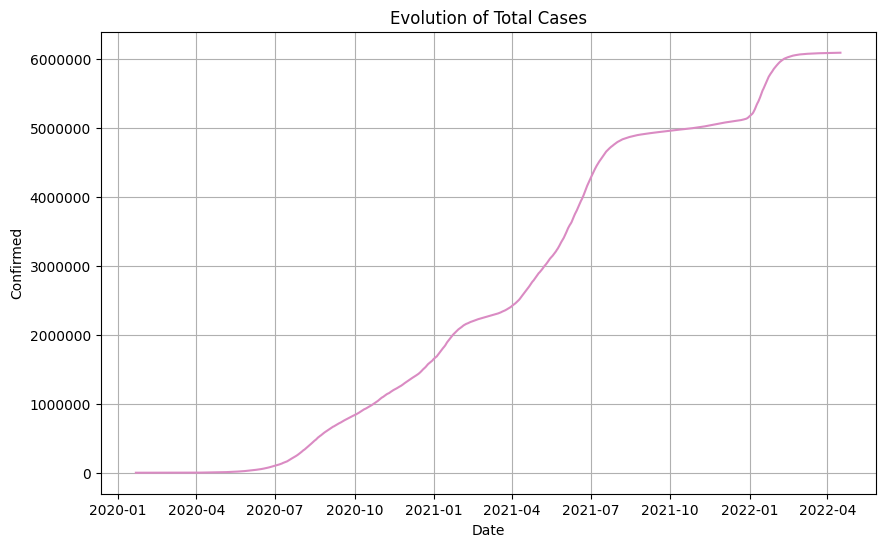

In [26]:
show_linePlot(dates, "Confirmed", "Evolution of Total Cases")

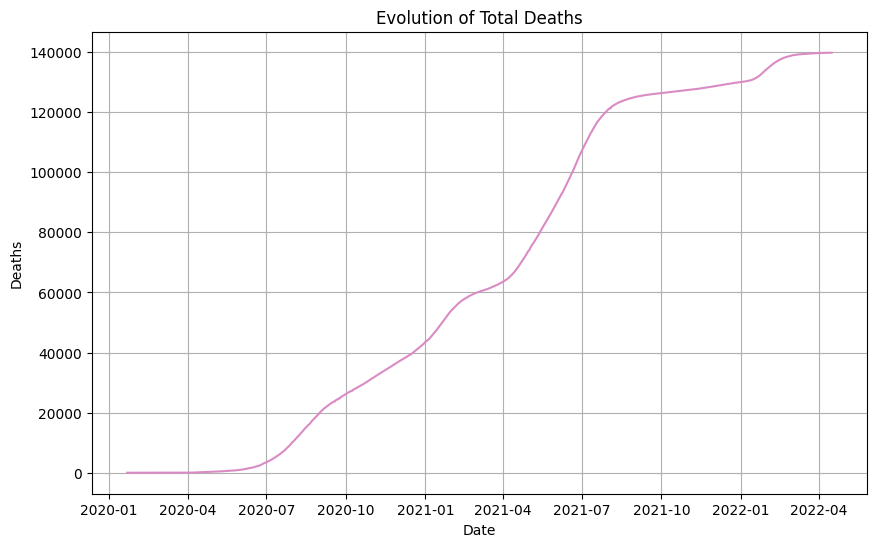

In [27]:
show_linePlot(dates, "Deaths", "Evolution of Total Deaths")

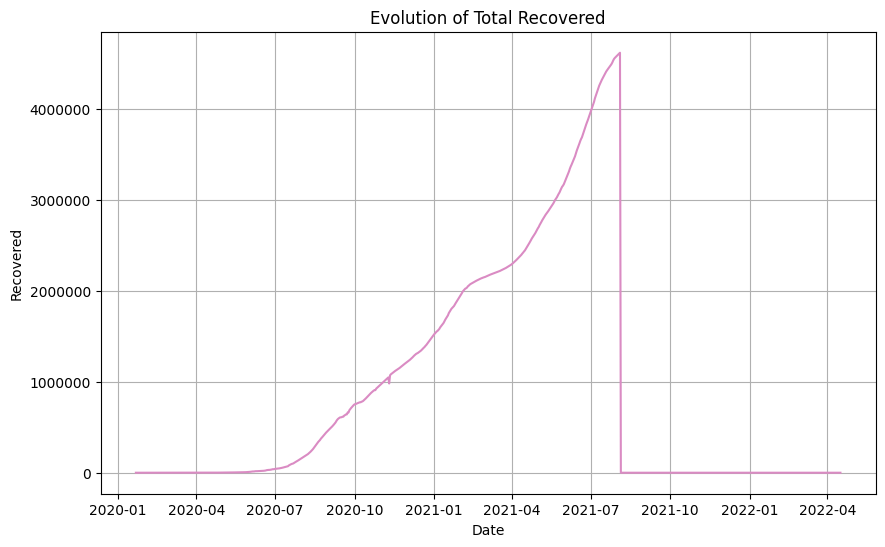

In [28]:
show_linePlot(dates, "Recovered", "Evolution of Total Recovered")

In [29]:
growth_rt = pd.DataFrame()
growth_rt['Growth Rate Confirmed'] = (dates["Confirmed"] - dates["Confirmed"].shift(1)) / dates["Confirmed"].shift(1) * 100
growth_rt['Growth Rate Deaths'] = (dates["Deaths"] - dates["Deaths"].shift(1)) / dates["Deaths"].shift(1) * 100
growth_rt['Growth Rate Recovered'] = (dates["Recovered"] - dates["Recovered"].shift(1)) / dates["Recovered"].shift(1) * 100

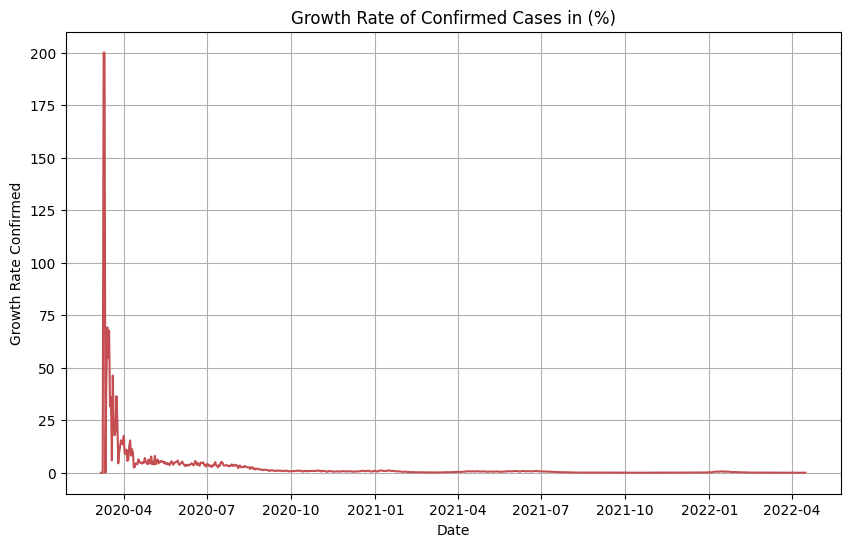

In [30]:
show_linePlot(growth_rt, "Growth Rate Confirmed", "Growth Rate of Confirmed Cases in (%)")

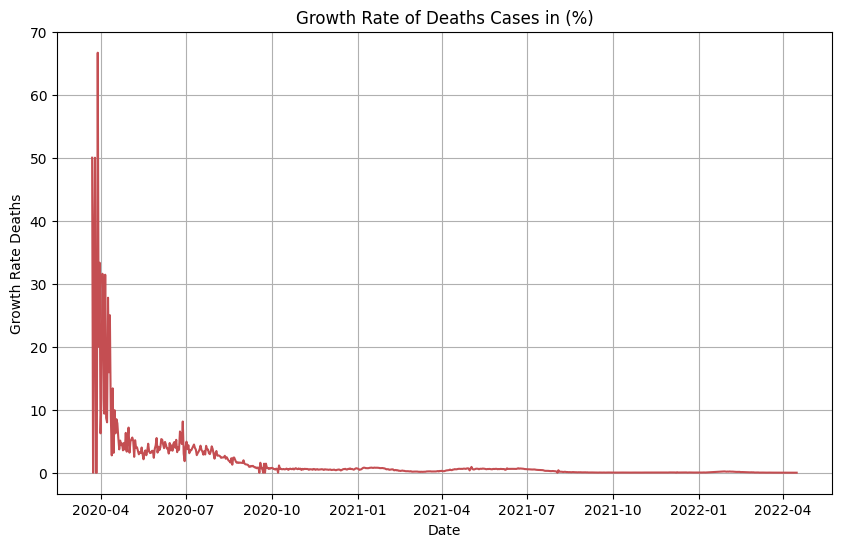

In [31]:
show_linePlot(growth_rt, "Growth Rate Deaths", "Growth Rate of Deaths Cases in (%)")

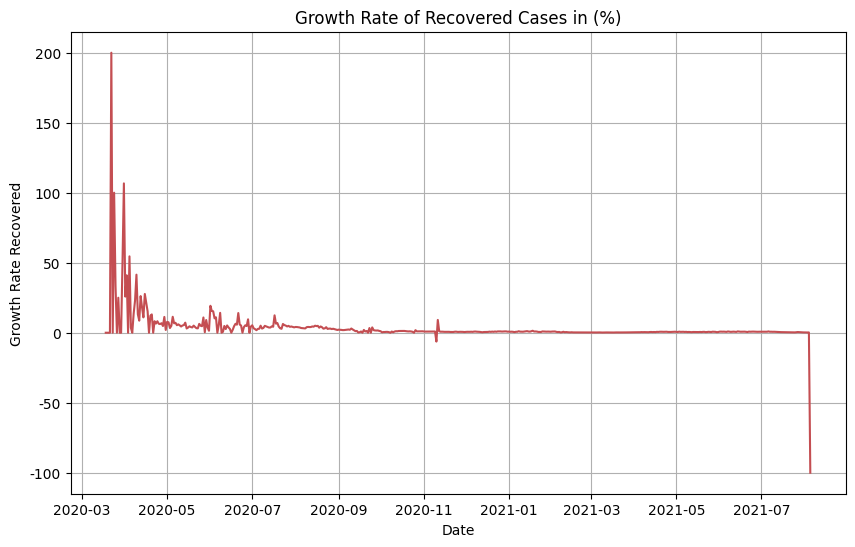

In [32]:
show_linePlot(growth_rt, "Growth Rate Recovered", "Growth Rate of Recovered Cases in (%)")

## Daily Cases

In [37]:
daily = pd.DataFrame()
daily['Daily Confirmed'] = dates['Confirmed'].diff().fillna(0)
daily['Daily Deaths'] = dates['Deaths'].diff().fillna(0)
daily['Daily Recovered'] = dates['Recovered'].diff().fillna(0).clip(lower=0)

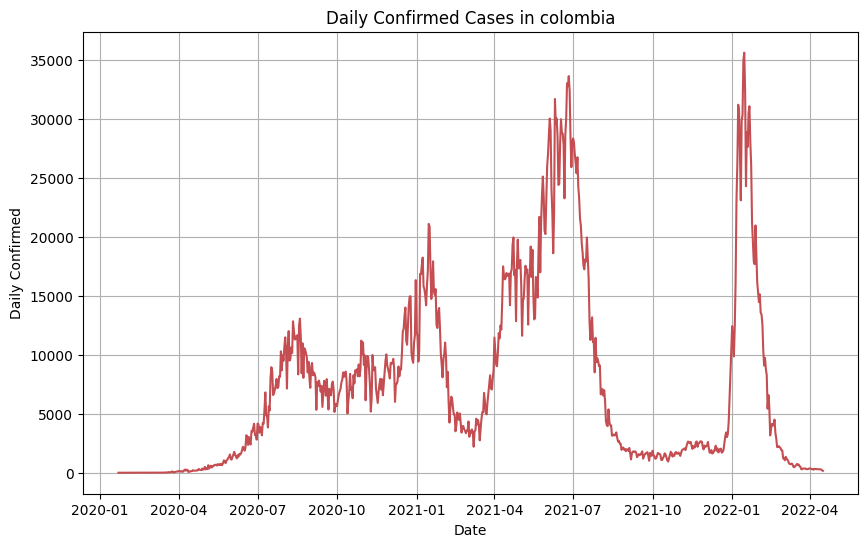

In [34]:
show_linePlot(daily, "Daily Confirmed", "Daily Confirmed Cases in colombia")

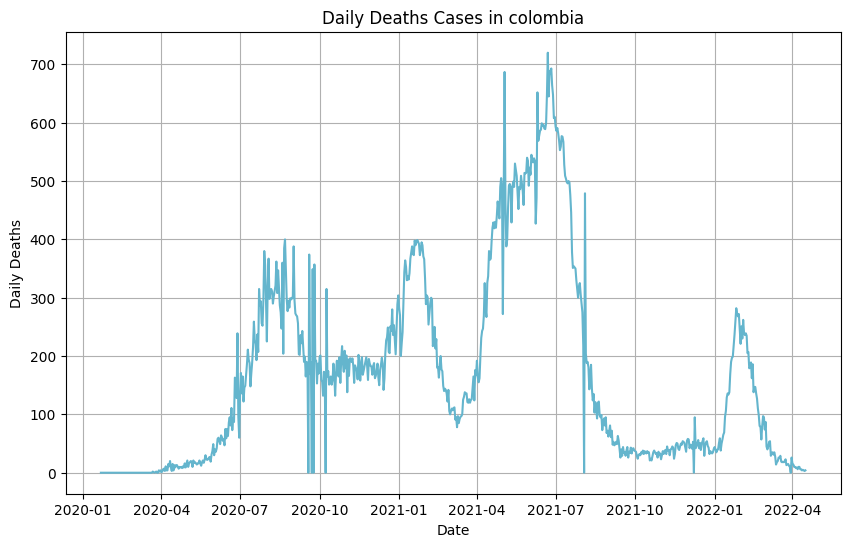

In [35]:
show_linePlot(daily, "Daily Deaths", "Daily Deaths Cases in colombia")

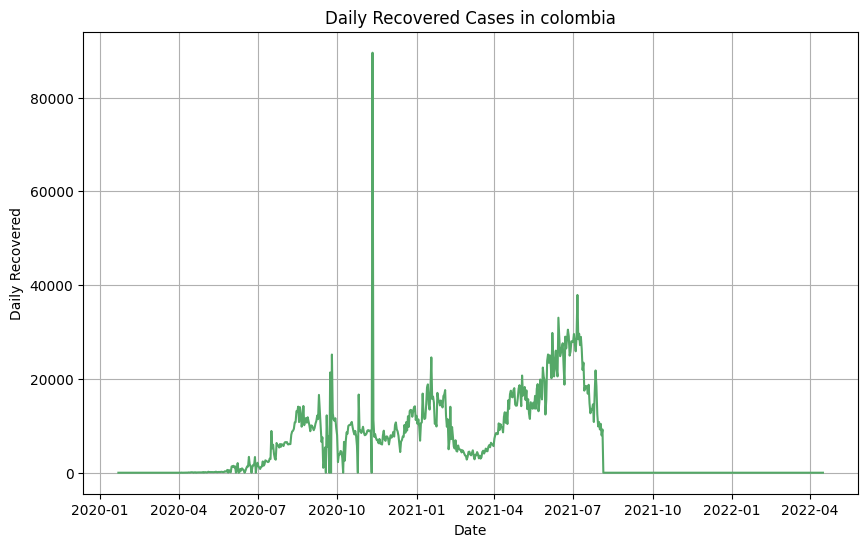

In [38]:
show_linePlot(daily, "Daily Recovered", "Daily Recovered Cases in colombia")